### Problem Statement

The goal is to understand the relationship between house features and how these
variables affect the house price.
Using more than one model, predict the price of the house using the given dataset. Please compare the
accuracy of the models along with the drawbacks of each technique's assumptions before recommending
the final prediction model.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

#### Loading Dataset

In [2]:
pd.set_option('display.max_rows',None)  #setting the display option to max
pd.set_option('display.max_columns',None)
price=pd.read_excel(r'F:\Internship - Data Science\DS - Assignment Part 1 data set.xlsx')
price.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
price.tail() #last five rows of the dataset

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5
413,2013.500000,6.5,90.45606,9,24.97433,121.54310,2,1097,63.9


In [4]:
print('Shape of the given Dataset',price.shape)

Shape of the given Dataset (414, 9)


Our dataset has 414 rows & 9 columns

In [5]:
price.columns #columns present in the dataset

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [6]:
price.info()   #a brief info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


The dataset contains only float or int values, there is no categorical value

In [7]:
price['Transaction date']=price['Transaction date'].astype(int)  #converting the transaction date from float to int to have a proper understanding

#### Checking the Null Values

In [8]:
price.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

Dataset has no null value

<AxesSubplot:>

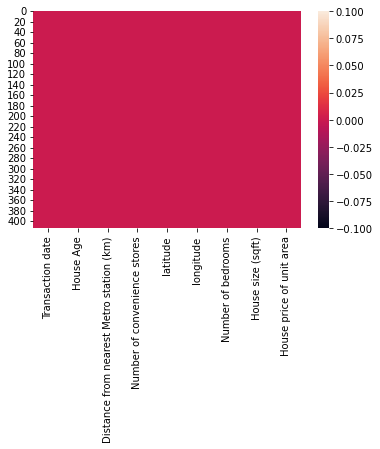

In [9]:
sns.heatmap(price.isnull())  #presenting the null values using the heatmap

#### Data Visualization

<AxesSubplot:xlabel='House Age', ylabel='House price of unit area'>

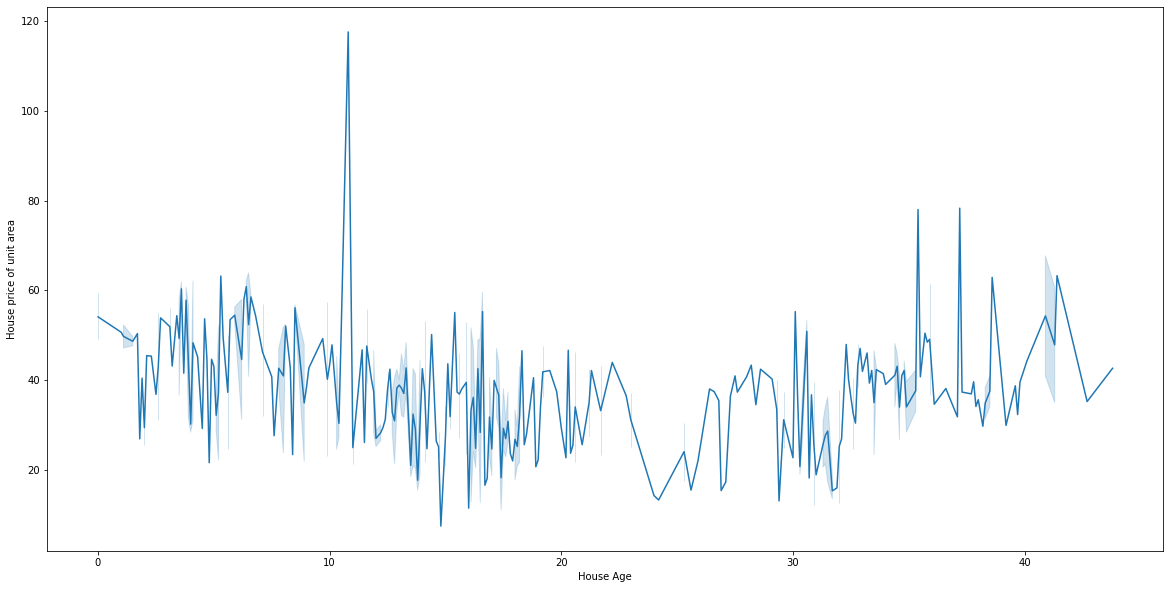

In [10]:
plt.figure(figsize=(20,10))
sns.lineplot(price['House Age'],price['House price of unit area'])

Houses those are around 10 years old, their prices are higher on average or houses are very old are expensive. 20 to 30 years old houses have less sales rate.

<AxesSubplot:xlabel='House size (sqft)', ylabel='House price of unit area'>

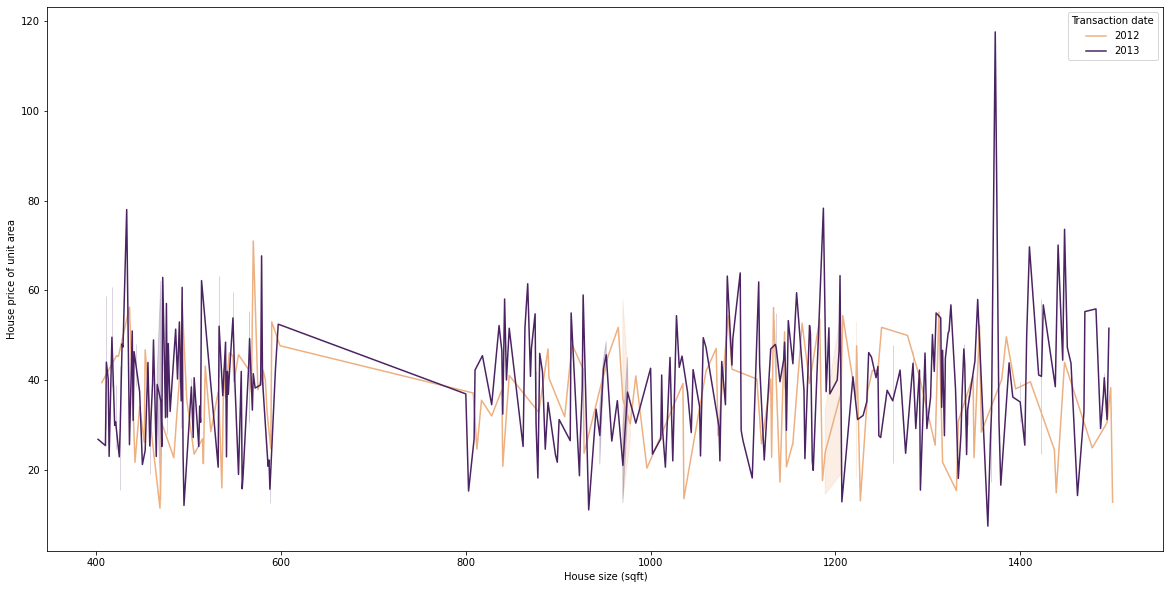

In [11]:
plt.figure(figsize=(20,10))
sns.lineplot(price['House size (sqft)'],price['House price of unit area'],hue=price['Transaction date'],palette='flare')

In 2013, houses between 1300 to 1400 sqft area sales rates are higher while in 2012 rates are in almost in the same range. There is no data available between 600 to 800 sqft area houses. 

No handles with labels found to put in legend.


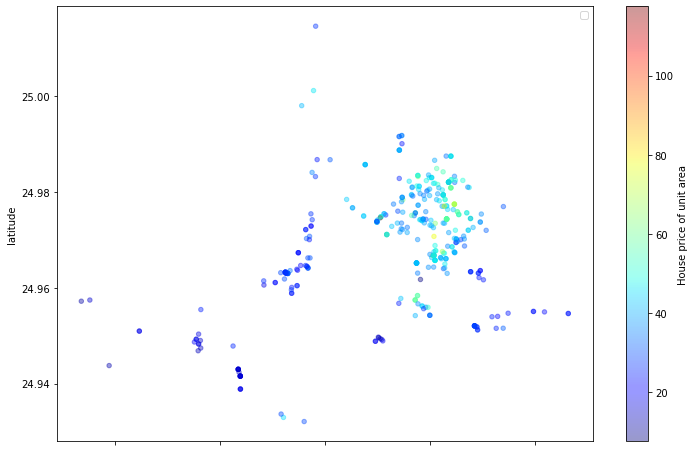

In [18]:
price.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
figsize=(12, 8), c='House price of unit area', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Number of convenience stores', ylabel='House price of unit area'>

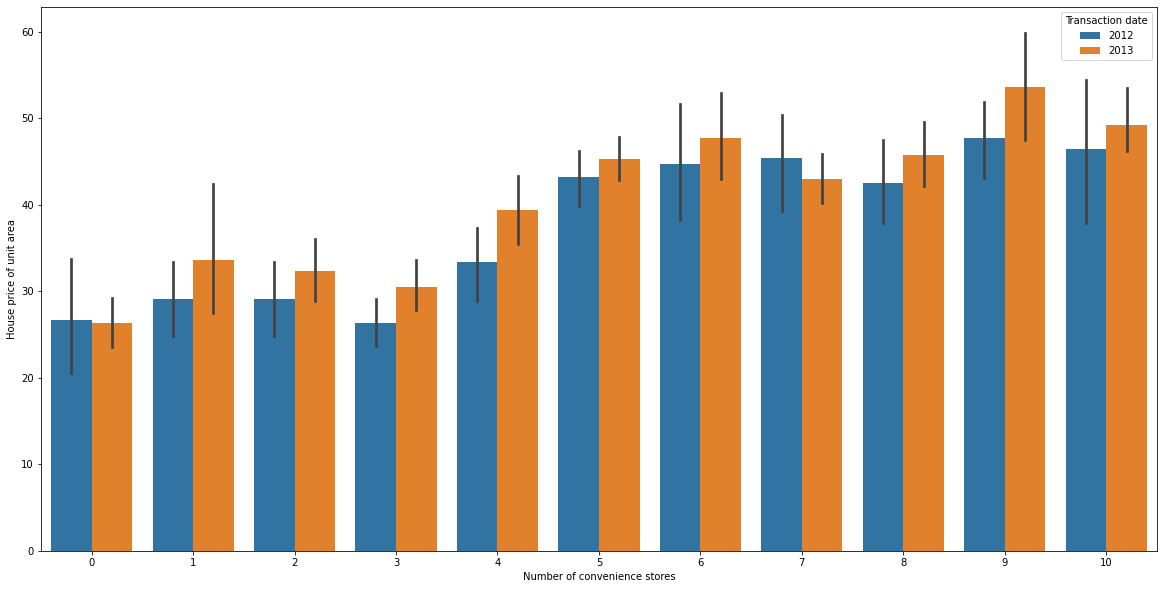

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(price['Number of convenience stores'],price['House price of unit area'],hue=price['Transaction date'])

Houses prices are higher with more number of convenience stores around them.

<AxesSubplot:xlabel='Distance from nearest Metro station (km)', ylabel='House price of unit area'>

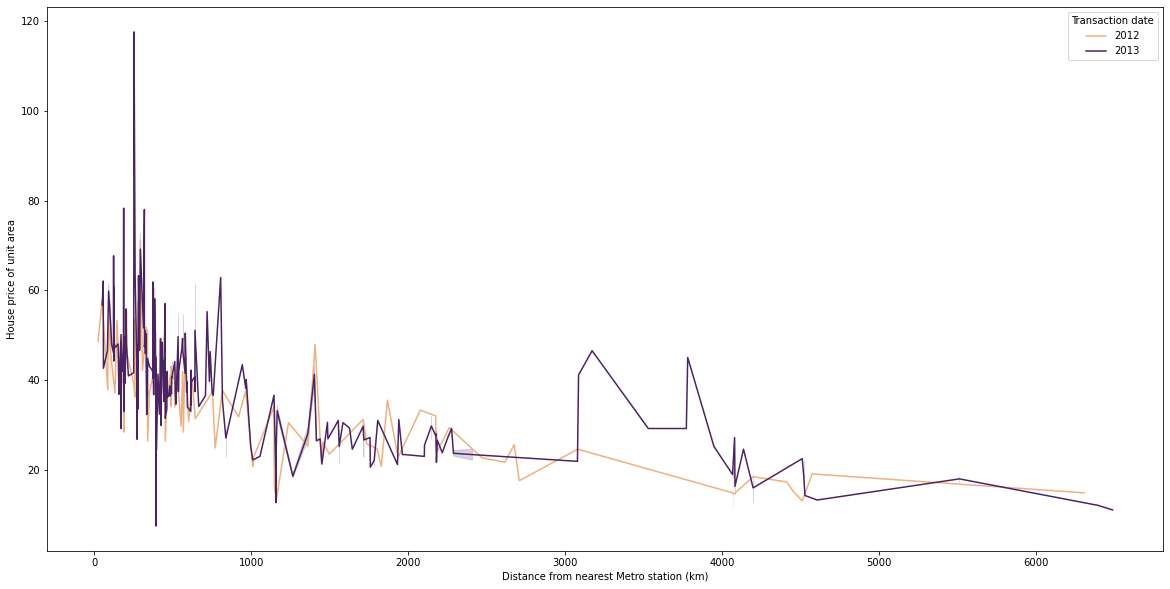

In [14]:
plt.figure(figsize=(20,10))
sns.lineplot(price['Distance from nearest Metro station (km)'],price['House price of unit area'],hue=price['Transaction date'],palette='flare')

If the metro station is near to the house then the price will be higher and it will be decreased with the increase in distance i.e. far away houses from metro are cheaper

<AxesSubplot:xlabel='Number of bedrooms', ylabel='House price of unit area'>

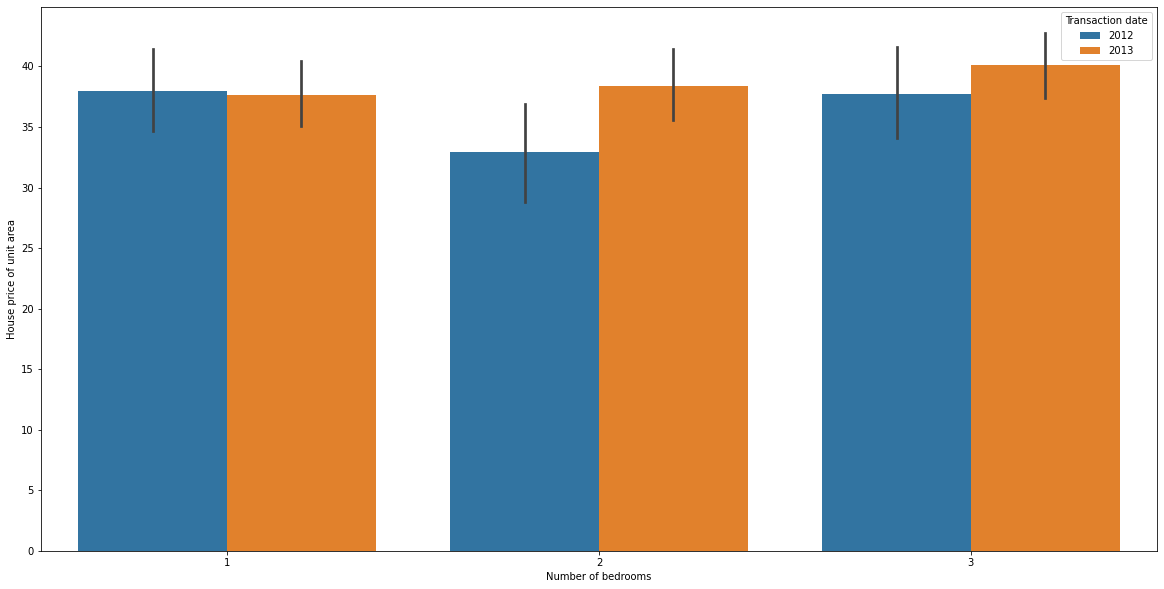

In [15]:
plt.figure(figsize=(20,10))
sns.barplot(price['Number of bedrooms'],price['House price of unit area'],hue=price['Transaction date'])

With more number of bedrooms, the house rate increased as we have seen through the graph

Transaction date                               AxesSubplot(0.125,0.657941;0.227941x0.222059)
House Age                                   AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Distance from nearest Metro station (km)    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Number of convenience stores                   AxesSubplot(0.125,0.391471;0.227941x0.222059)
latitude                                    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
longitude                                   AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Number of bedrooms                                AxesSubplot(0.125,0.125;0.227941x0.222059)
House size (sqft)                              AxesSubplot(0.398529,0.125;0.227941x0.222059)
House price of unit area                       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

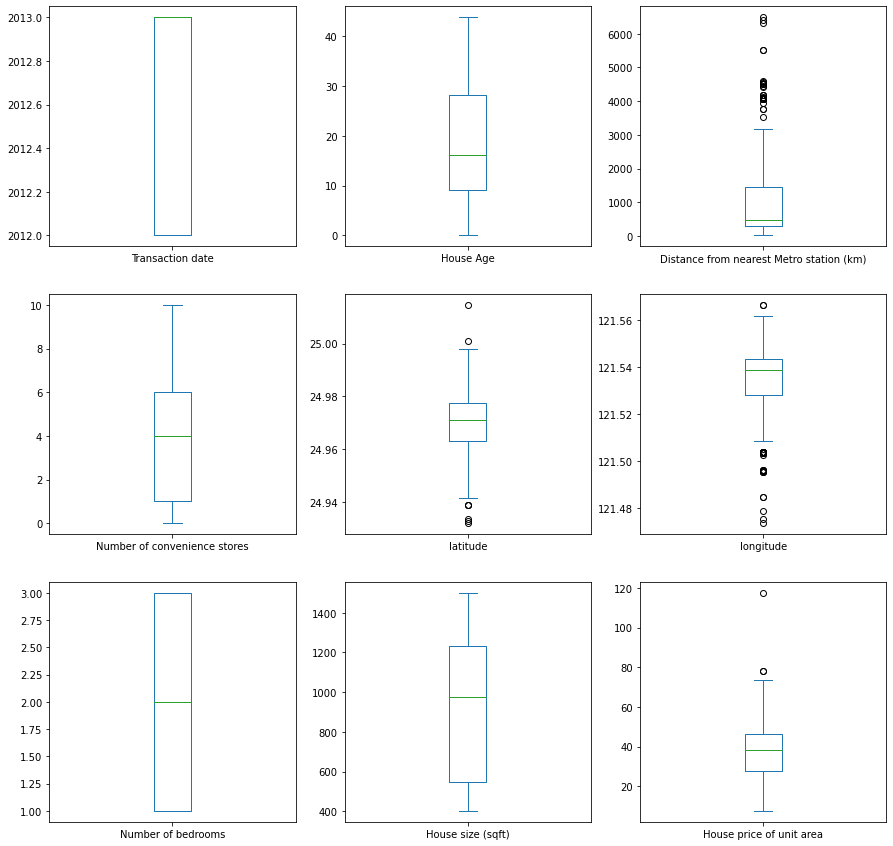

In [27]:
price.plot(kind='box',subplots=True, figsize=(15,15),layout=(3,3))

There are columns with the outliers which will be handled later

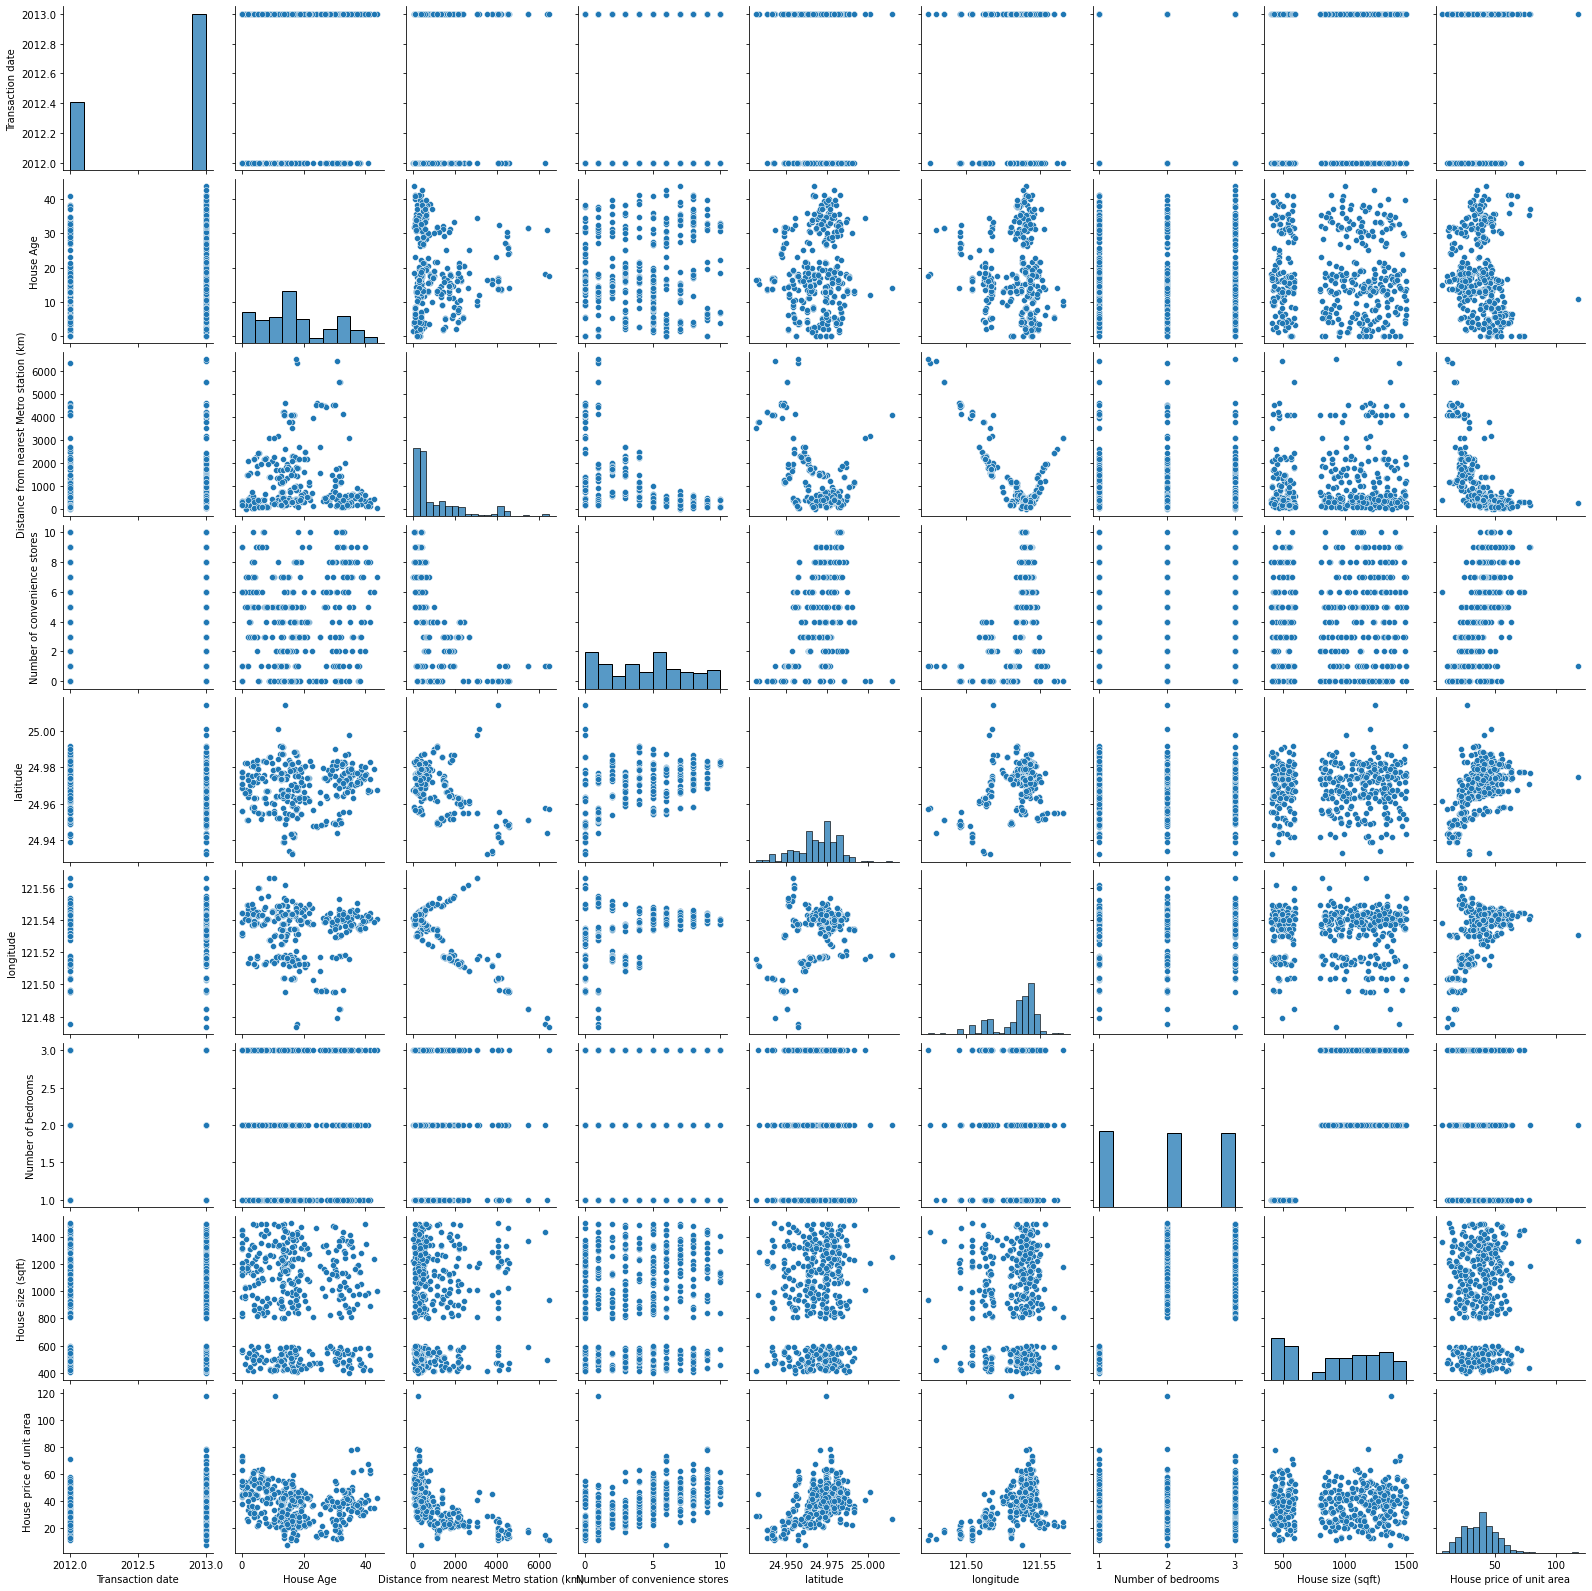

In [26]:
sns.pairplot(price)

- The prices of houses are increased in 2013 from 2012

#### Statistical Summary

In [19]:
price.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2012.695652,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.460687,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.000000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.000000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.000000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.000000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


- There are houses with 0 convenience stores & newly made even not complete 1 year
- Maximum age of a house is 43
- Largest area of house avaliable is 1500 sqft while the smallest area available is 402 sqft
- Minimum distance between nearest metro & the house is 23 km while the maximum distance is 6488 kms
- Minimal skewness is available in the dataset

#### Correlation

In [20]:
corr=price.corr()
corr

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.049171,0.016519,-0.005586,0.008118,0.013177,0.028743,0.025156,0.081545
House Age,0.049171,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.016519,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.008118,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,0.013177,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.028743,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.025156,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.081545,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


<AxesSubplot:>

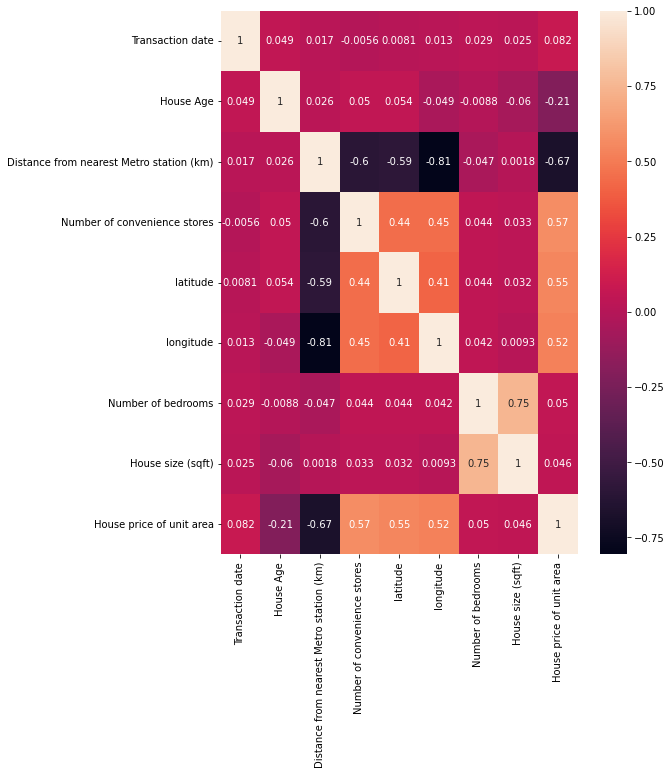

In [22]:
#plotting the correlation
plt.figure(figsize=(8,10))
sns.heatmap(corr,annot=True)

In [23]:
corr['House price of unit area'].sort_values()

Distance from nearest Metro station (km)   -0.673613
House Age                                  -0.210567
House size (sqft)                           0.046489
Number of bedrooms                          0.050265
Transaction date                            0.081545
longitude                                   0.523287
latitude                                    0.546307
Number of convenience stores                0.571005
House price of unit area                    1.000000
Name: House price of unit area, dtype: float64

As we see parameters are positively correlated means there is increase in the house price with increase in their values except two parameters namely Distance from nearest metro station & House age which are negatvely correlated with house price.

In [24]:
price.skew()   #checking skewness

Transaction date                           -0.853516
House Age                                   0.382926
Distance from nearest Metro station (km)    1.888757
Number of convenience stores                0.154607
latitude                                   -0.438598
longitude                                  -1.219591
Number of bedrooms                          0.022309
House size (sqft)                          -0.113627
House price of unit area                    0.599853
dtype: float64

Data is very less skewed so we can forward with our model building

In [29]:
#sepearting the dependent and independent varaibles
x=price.iloc[:,:-1]
y=price.iloc[:,-1]

#### Removing the outliers

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(price))
threshold=3
print(np.where(z>3))
price_new=price[(z<3).all(axis=1)]
price=price_new
price.shape

(array([  8,   8,  35, 116, 116, 249, 249, 255, 255, 270, 347, 347],
      dtype=int64), array([2, 5, 4, 2, 5, 2, 5, 2, 5, 8, 2, 5], dtype=int64))


(407, 9)

Now our dataset is free from outliers

In [32]:
# defining the different models

lg=LinearRegression()
rdr=RandomForestRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()
ls=Lasso()

In [36]:
#finding the best random state

model=[lg,rdr,svr,dtr,ls]
maxAcc=0
maxRS=0
for i in range(40,60):
    x_price,x_test,y_price,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    lg.fit(x_price,y_price)
    pred=lg.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best Accuracy score is', maxAcc , 'on random state', maxRS)

Best Accuracy score is 0.7082829496503669 on random state 56


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.20) #splitting the dataset to training & testiog using train_test_split method

#### Linear Regression

In [38]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=r2_score(y_test,pred1)
print('Accuracy Score: ',acc)

Accuracy Score:  0.7082829496503669


#### Decision Tree Regressor

In [39]:
dtr.fit(x_train,y_train)
pred2=dtr.predict(x_test)
acc=r2_score(y_test,pred2)
print('Accuracy Score: ',acc)

Accuracy Score:  0.6760460424337594


#### Suppport Vector Regressor

In [40]:
svr.fit(x_train,y_train)
pred3=svr.predict(x_test)
acc=r2_score(y_test,pred3)
print('Accuracy Score: ',acc)

Accuracy Score:  0.5890251694112629


#### Lasso

In [41]:
ls.fit(x_train,y_train)
pred4=ls.predict(x_test)
acc=r2_score(y_test,pred4)
print('Accuracy Score: ',acc)

Accuracy Score:  0.6824933445846211


#### Random Forest Regressor

In [42]:
rdr.fit(x_train,y_train)
pred5=rdr.predict(x_test)
acc=r2_score(y_test,pred5)
print('Accuracy Score: ',acc)

Accuracy Score:  0.7332987638964292


We are getting the highest accuracy from Random Forest Regressor Algorithm, let's check the errors in each algorithm

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
l1=[pred1,pred2,pred3,pred4,pred5]
for i in l1:
    print('error:')

    print('mean absolute error: ',mean_absolute_error(y_test,i))
    print('mean squared error: ',mean_squared_error(y_test,i))
    print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,i)))
    print('\n')

error:
mean absolute error:  5.508248324778539
mean squared error:  48.37590891621205
root mean squared error:  6.95527921195203


error:
mean absolute error:  5.54578313253012
mean squared error:  53.72180722891566
root mean squared error:  7.329516166085976


error:
mean absolute error:  6.26396501494867
mean squared error:  68.15261894218389
root mean squared error:  8.255459947342963


error:
mean absolute error:  5.796068079058583
mean squared error:  52.65264071557144
root mean squared error:  7.256213938106527


error:
mean absolute error:  4.665156626506023
mean squared error:  44.22749609638555
root mean squared error:  6.65037563573559




Random Forest Regressor has the lowest errors, so we will move forward with this

#### Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score
for i in range(3,7):
    cr=cross_val_score(rdr,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  68.55639892802054
at cv=  4
cross val score =  65.90176359723598
at cv=  5
cross val score =  67.56818673000924
at cv=  6
cross val score =  68.41070131011475


#### Hypermeter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV
# creating parameters
para={'criterion':['squared_error','absolute_error','poisson'],
     'max_features':['sqrt','log2'],
     'max_depth':[1,2,3,4,5]}

GCV=GridSearchCV(rdr,para,cv=3,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'squared_error', 'max_depth': 1, 'max_features': 'sqrt'}

In [46]:
GCV_pred=GCV.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.5319947315593827

#### Saving the Model

In [47]:
import pickle
filename='houseprice.pkl'
pickle.dump(rdr, open(filename,'wb'))

#### Comparing Actual & Predicted House Prices

In [48]:
a=np.array(y_test)
pred=np.array(pred5)
Sale_Price=pd.DataFrame({'Actual':a,'Predicted':pred})
Sale_Price

,Actual,Predicted
0,45.4,50.324
1,28.6,31.062
2,46.6,46.936
3,62.1,50.727
4,33.6,51.914
5,55.0,50.073
6,49.3,50.507
7,48.5,48.633
8,26.9,47.190
9,50.7,48.656
